# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_players = pd.read_csv('data/all_players.csv')
all_players.head()

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,LeBron James,22,CLE,SF,78,78,3190,24.5,0.552,0.191,...,31.0,8.0,5.7,13.7,0.206,5.9,2.2,8.1,8.1,2006-2007
1,Dirk Nowitzki,28,DAL,PF,78,78,2820,27.6,0.605,0.129,...,28.9,11.8,4.5,16.3,0.278,7.2,1.2,8.3,7.4,2006-2007
2,Tim Duncan,30,SAS,C,80,80,2726,26.1,0.579,0.008,...,27.9,6.3,6.8,13.0,0.230,3.8,3.2,7.0,6.2,2006-2007
3,Kobe Bryant,28,LAL,SG,77,77,3140,26.1,0.580,0.227,...,33.6,10.8,2.2,13.0,0.199,6.4,-0.5,5.9,6.1,2006-2007
4,Kevin Garnett,30,MIN,PF,76,76,2995,24.1,0.546,0.042,...,27.4,5.7,4.9,10.7,0.171,3.8,1.7,5.4,5.5,2006-2007


In [35]:
luka_data = pd.read_csv('data/luka_data.csv')
luka_advanced_data = pd.read_csv('data/luka_advanced.csv')
luke_combined_data = pd.concat([luka_advanced_data, luka_data,], axis=1)
luke_combined_data.tail()

,Season,Age,Team,Lg,Pos,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
2,2020-21,21,DAL,NBA,PG,66,66,2262,25.3,0.587,...,0.8,7.2,8.0,8.6,1.0,0.5,4.3,2.3,27.7,MVP-6ASNBA1
3,2021-22,22,DAL,NBA,PG,65,65,2301,25.1,0.571,...,0.9,8.3,9.1,8.7,1.2,0.6,4.5,2.2,28.4,MVP-5ASNBA1
4,2022-23,23,DAL,NBA,PG,66,66,2391,28.7,0.609,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,MVP-8CPOY-8ASNBA1
5,2023-24,24,DAL,NBA,PG,70,70,2624,28.1,0.617,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,MVP-3CPOY-6ASNBA1
6,2024-25,25,DAL,NBA,PG,22,22,785,24.6,0.584,...,0.7,7.6,8.3,7.8,2.0,0.4,3.4,2.6,28.1,NaN


In [36]:
AD_data = pd.read_csv('data/AD.csv')
AD_advanced_data = pd.read_csv('data/AD_advanced.csv')
AD_combined_data = pd.concat([AD_advanced_data, AD_data,], axis=1)
AD_combined_data.tail()

,Season,Age,Team,Lg,Pos,G,GS,MP,PER,TS%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards
9,2021-22,28,LAL,NBA,C,40,40,1404,23.9,0.578,...,27.1,2.6,2.0,4.5,0.155,2.6,1.2,3.8,2.0,NaN
10,2022-23,29,LAL,NBA,C,56,54,1904,27.8,0.627,...,28.4,5.5,3.4,9.0,0.226,4.6,1.7,6.3,4.0,NaN
11,2023-24,30,LAL,NBA,C,76,76,2700,25.8,0.621,...,26.7,7.2,4.7,11.8,0.210,3.5,1.7,5.1,4.9,DPOY-4ASNBA2
12,2024-25,31,LAL,NBA,C,42,42,1440,27.3,0.601,...,30.4,3.8,2.4,6.2,0.208,4.5,1.2,5.8,2.8,NaN
13,13 Yrs,13 Yrs,13 Yrs,13 Yrs,NaN,778,771,26849,26.9,0.593,...,28.3,73.4,44.9,118.3,0.212,4.4,1.5,5.9,53.8,NaN


In [7]:
trades = pd.read_csv('trades2.csv')
trades.head()

,Teams,Players Traded,Draft Picks
0,"Phoenix Suns, Los Angeles, Chicago Bulls, Miam...","Chris Duarte, Max Strus, cash, Davis Bertans a...",NaN
1,Indiana Pacers,Chris Duarte,NaN
2,Detroit Pistons,NaN,NaN
3,NaN,Max Strus,NaN
4,Dallas Mavericks,cash,NaN


In [37]:
luke_combined_data = luke_combined_data.tail()
AD_combined_data = AD_combined_data.iloc[:-1]
AD_combined_data = AD_combined_data.tail()

# Using only the useful features (& only cols that are shared between AD and Luka DFs)

In [38]:
luke_numeric_columns = luke_combined_data.select_dtypes(include=['float64', 'int64']).columns
AD_numeric_columns = AD_combined_data.select_dtypes(include=['float64', 'int64']).columns
common_numeric_columns = luke_numeric_columns.intersection(AD_numeric_columns)

luke_reduced = luke_combined_data[common_numeric_columns]
AD_reduced = AD_combined_data[common_numeric_columns]
luke_reduced = luke_reduced.loc[:, ~luke_reduced.columns.duplicated()]
AD_reduced = AD_reduced.loc[:, ~AD_reduced.columns.duplicated()]

In [39]:
columns = AD_reduced.columns
num_columns = len(columns)
num_rows = (num_columns // 4) + 1  

# 1. Side by side Bar Charts

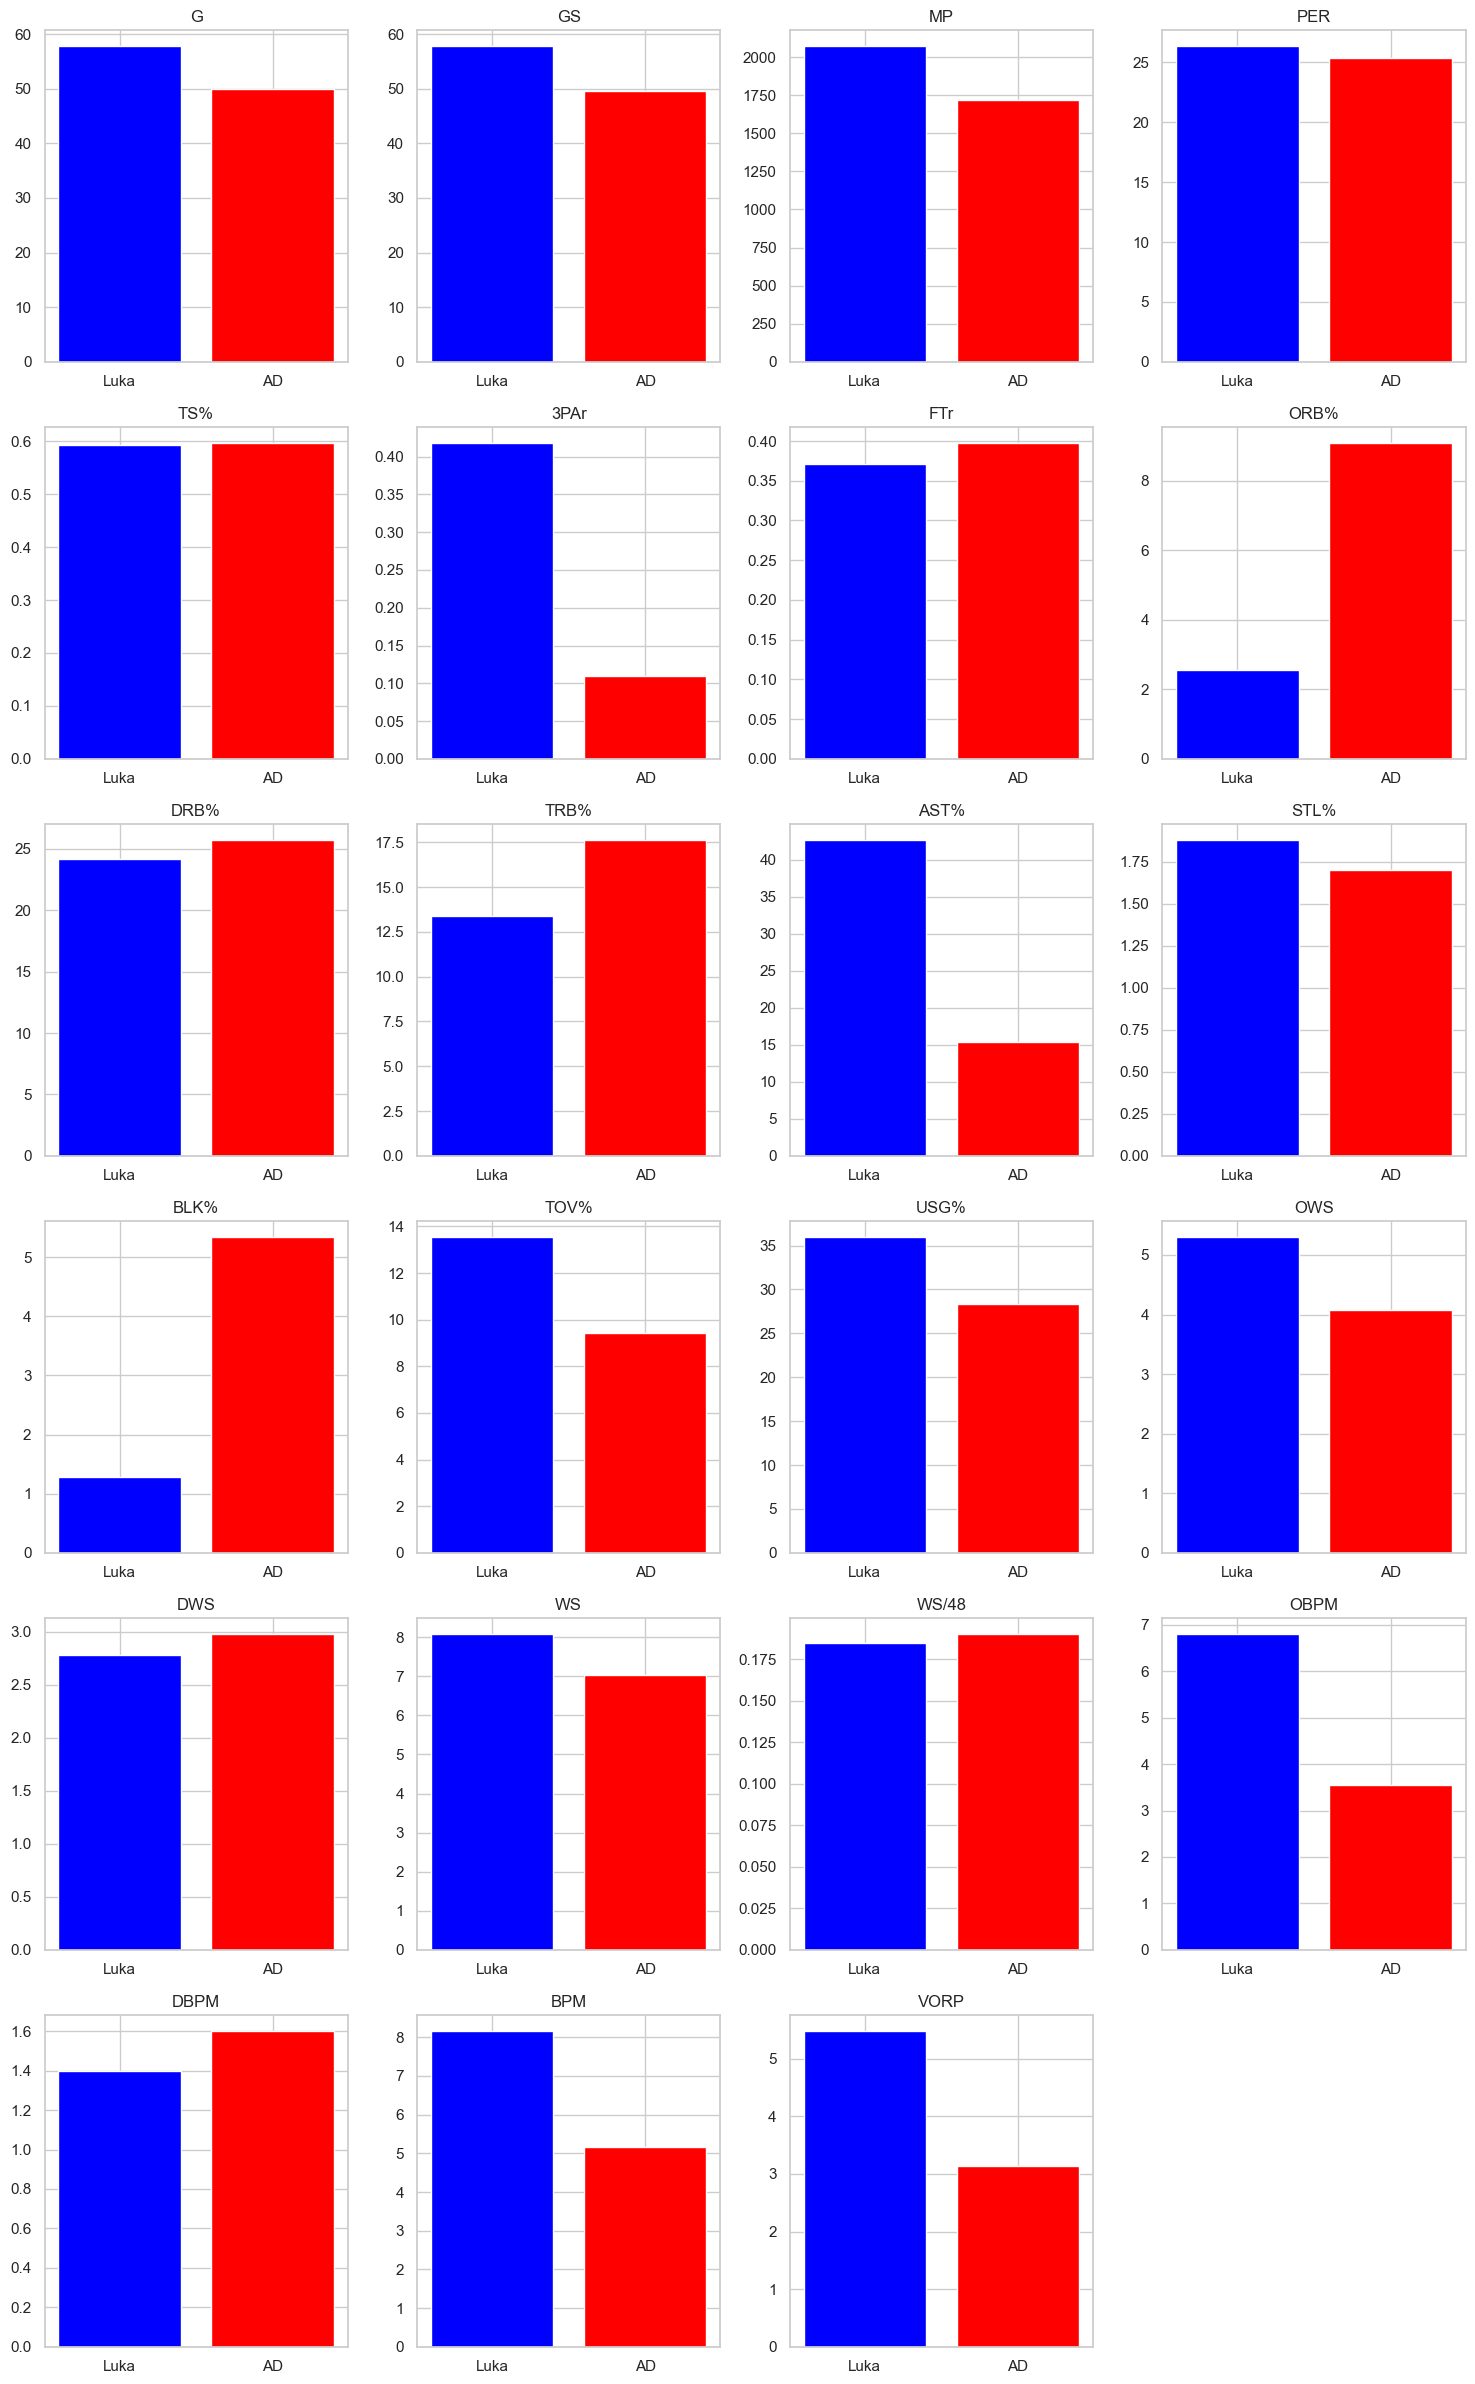

In [44]:
plt.figure(figsize=(15, num_rows * 4))
for idx, col in enumerate(columns):
    plt.subplot(num_rows, 4, idx + 1)
    plt.bar(['Luka', 'AD'], [luke_reduced[col].mean(), AD_reduced[col].mean()], color=['blue', 'red'])
    plt.title(col)
plt.tight_layout()
plt.show()

# 2. Boxplots

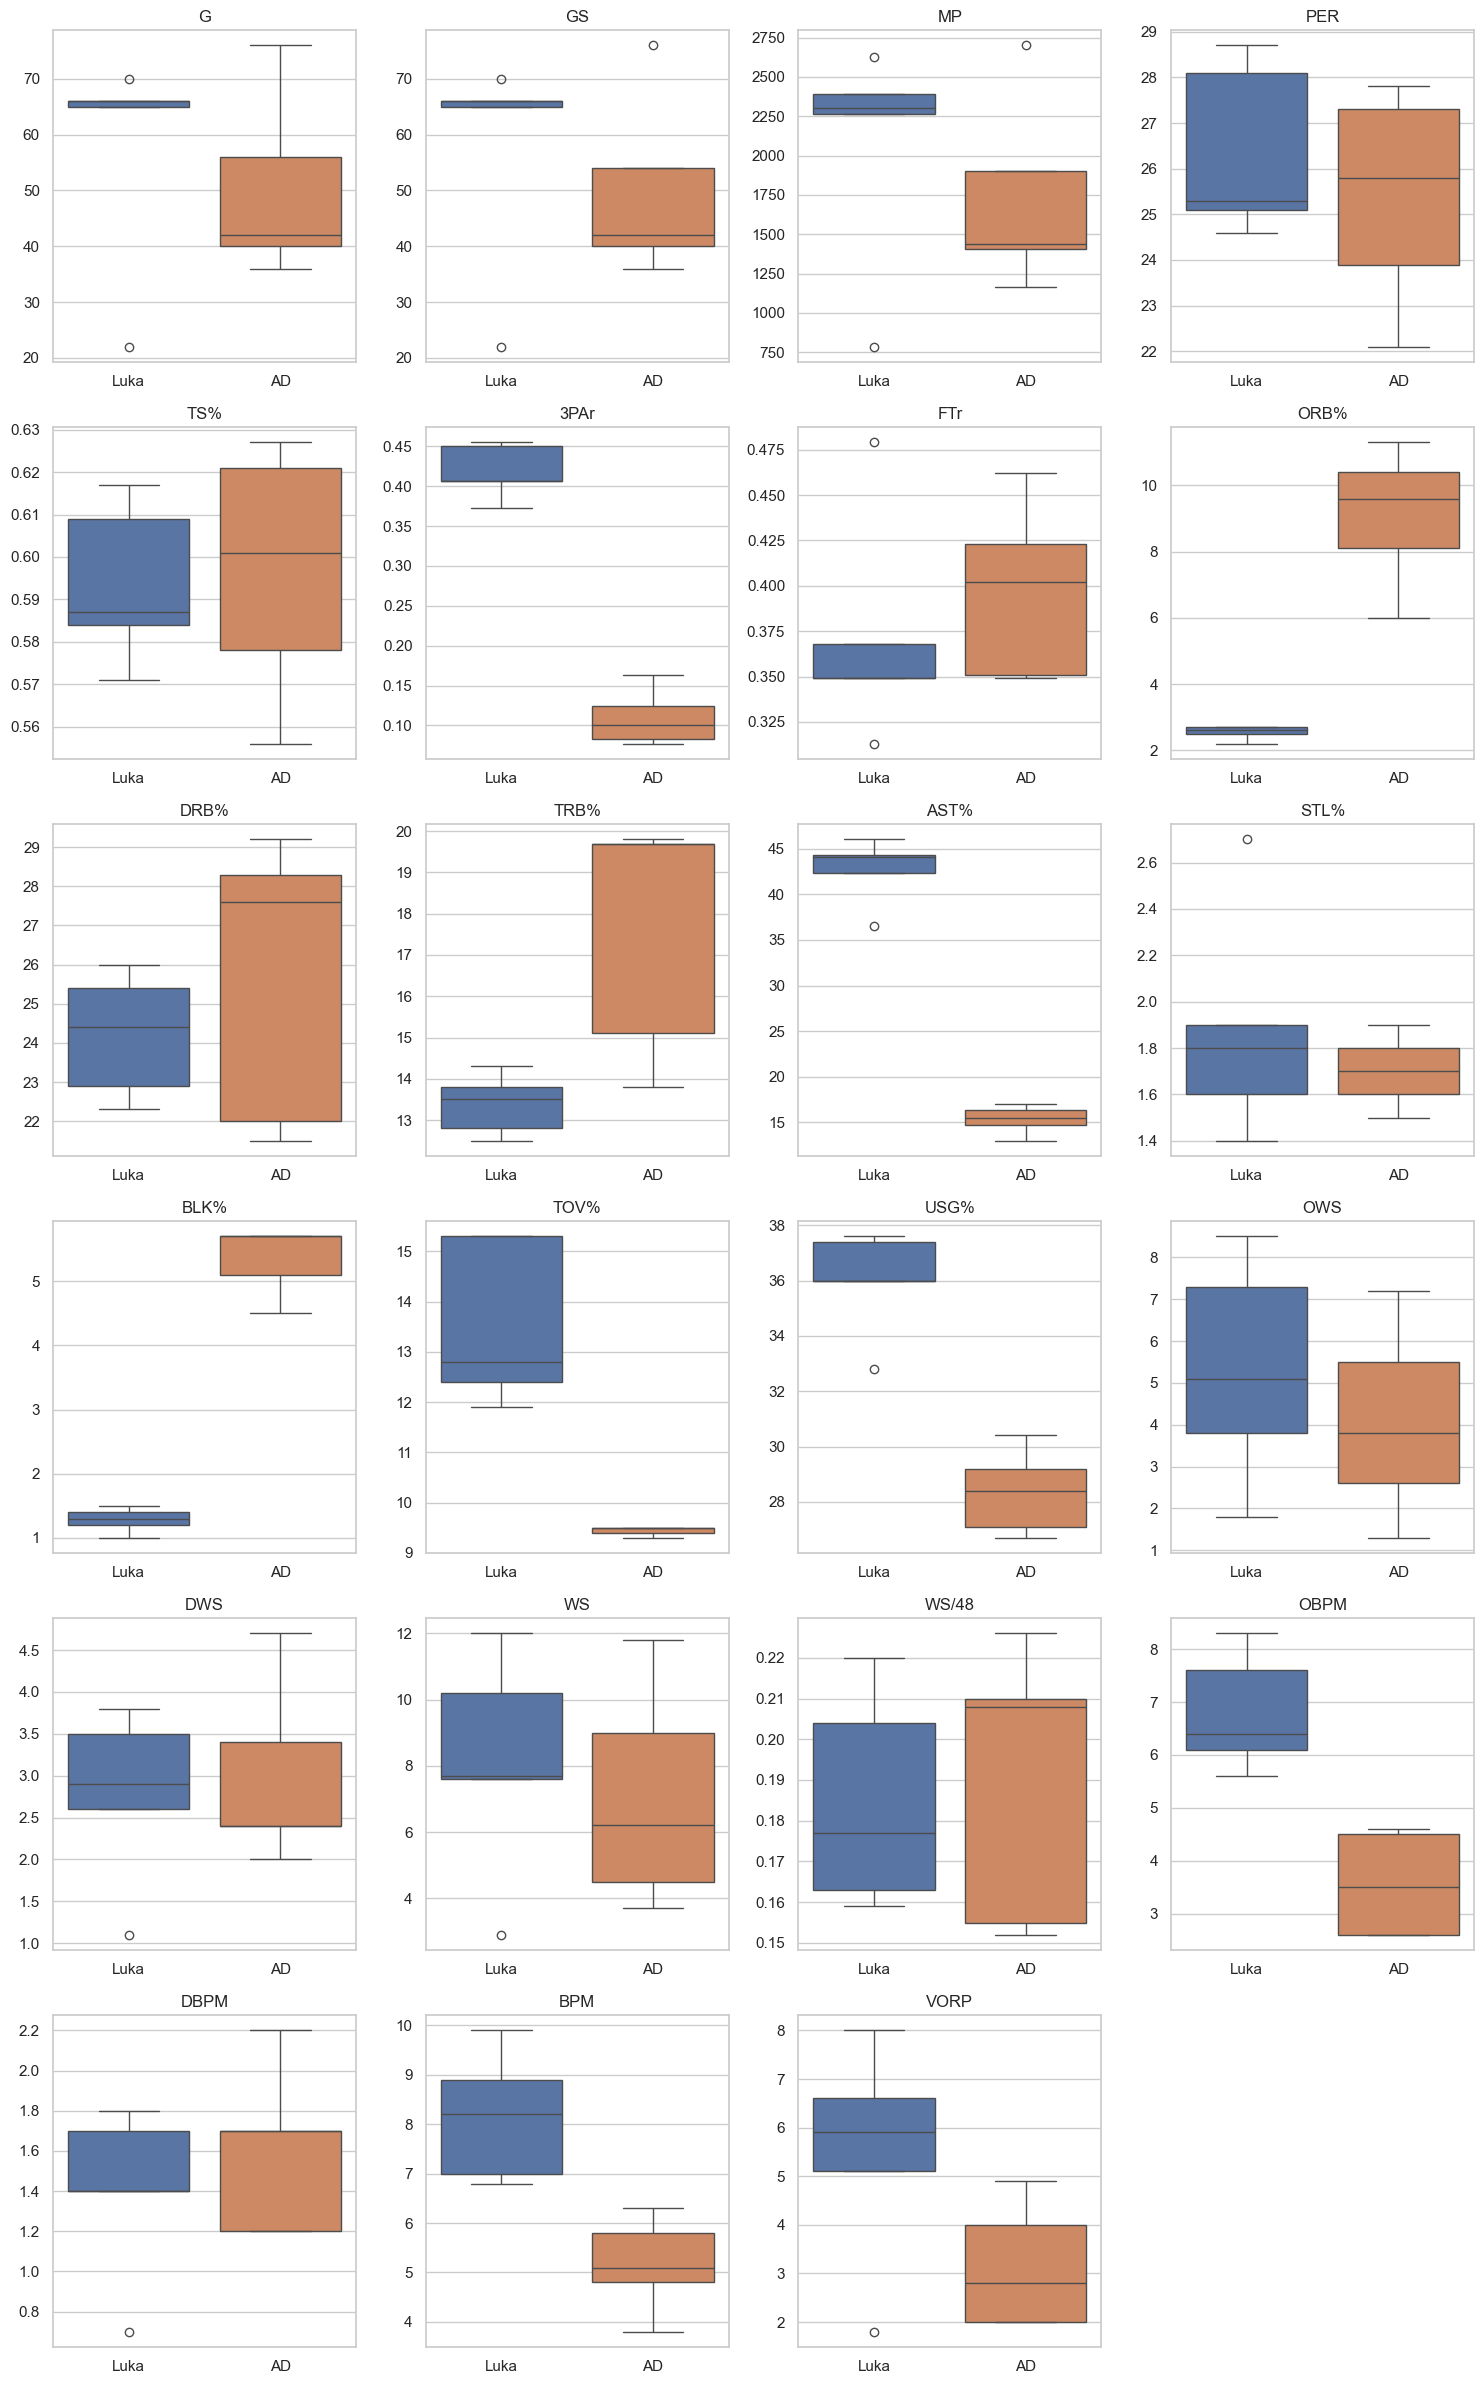

In [45]:
plt.figure(figsize=(15, num_rows * 4))
for idx, col in enumerate(columns):
    plt.subplot(num_rows, 4, idx + 1)
    sns.boxplot(data=pd.DataFrame({'Luka': luke_reduced[col], 'AD': AD_reduced[col]}))
    plt.title(col)
plt.tight_layout()
plt.show()

# 3. KDE ( https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/ )

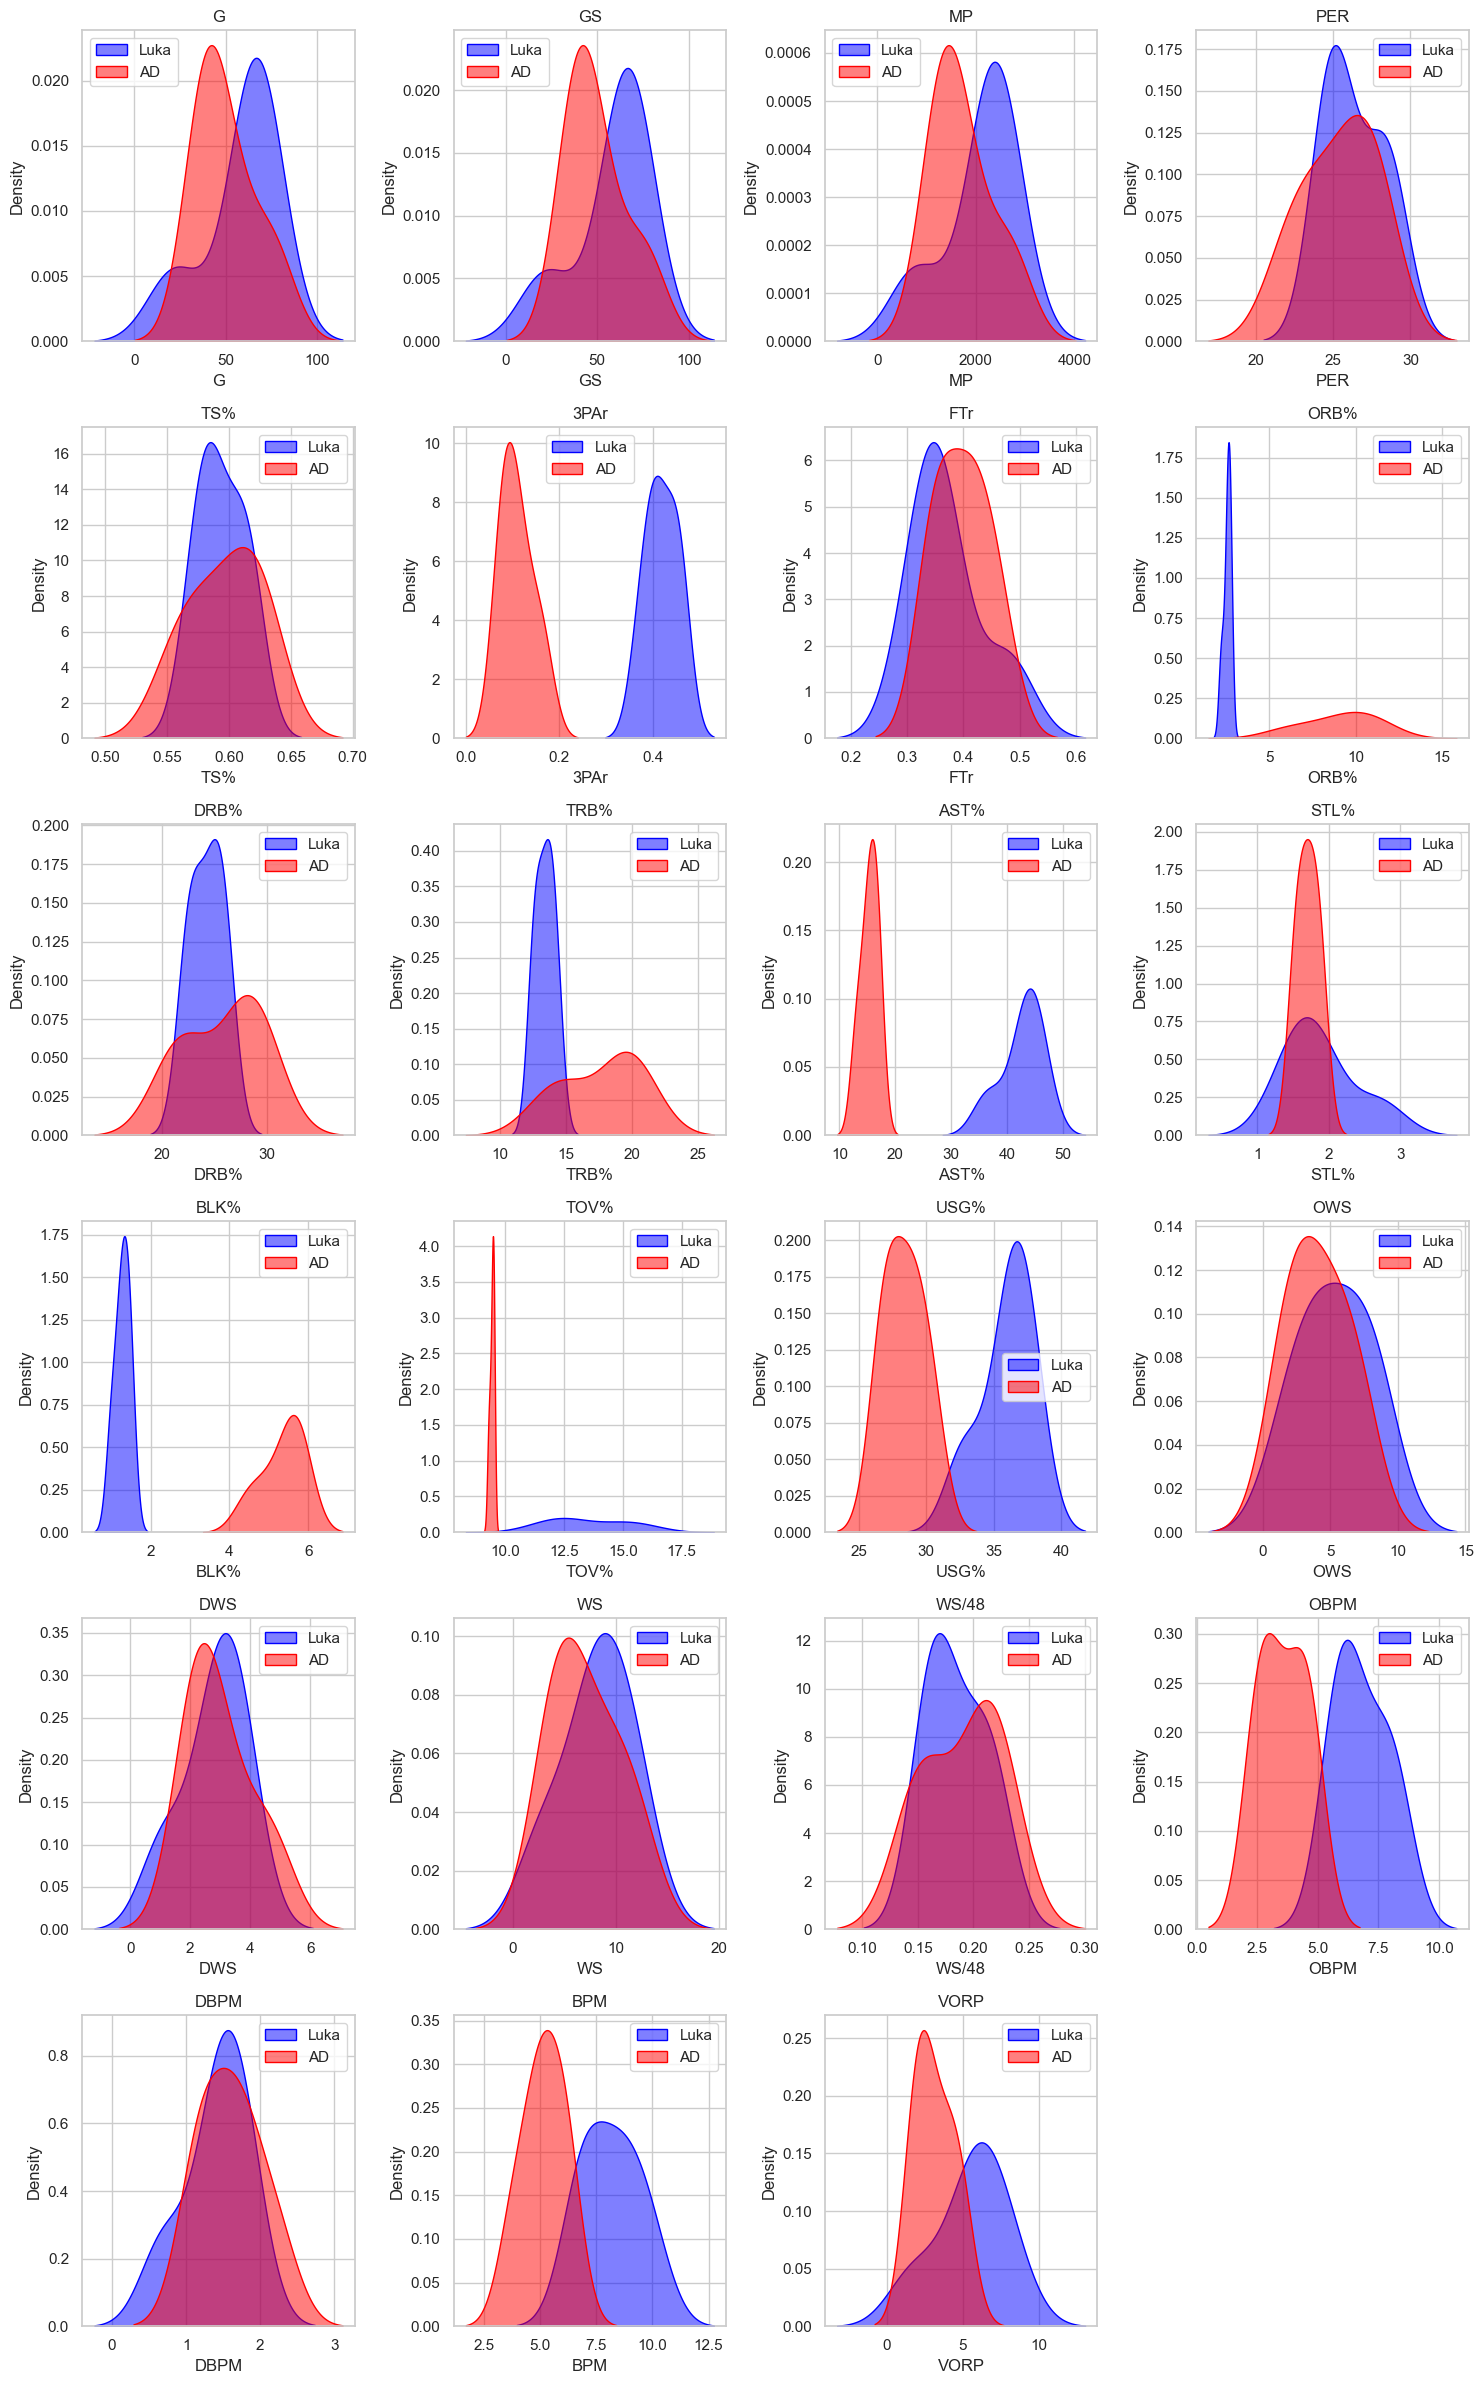

In [46]:
plt.figure(figsize=(15, num_rows * 4))
for idx, col in enumerate(columns):
    plt.subplot(num_rows, 4, idx + 1)
    sns.kdeplot(luke_reduced[col], label='Luka', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(AD_reduced[col], label='AD', fill=True, color='red', alpha=0.5)
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()